In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the Washington State Department of Ecology

The Washington State Department of Ecology provides data through their Environmential Information Managment (EIM) System.

We were interested in data from a well site with location id: AEK201

Using the search tools here: [https://apps.ecology.wa.gov/eim/search/Eim/EIMSearch.aspx](https://apps.ecology.wa.gov/eim/search/Eim/EIMSearch.aspx)

We can find the site information, and request to download the avilable data. Once the request is process, the data is provided via email, with a link to a .zip file containing the relavant data.

For the code below, the contents of that .zip file were placed in a directory named `EIM-data-AEK201`, a subdirectory of `data`, located in the same directory as this notebook.

# This notebook

The code below loads the timeseries data provided for this site into a dataframe. Some light cleaning is done and the result is a dataframe that contains the following information for this well:
- `meas_time` : The date and time at which the measurment was recorded
- `water_elevation` : Calculated water level elevation, relative to NAVD88F, in feet
- `water_depth`: Calculated water level epth_Below_Land_Surface_FT':'water_depth

#### Loading the data

In [12]:
data = pd.read_csv('../data/raw_data/EIM-data-AEK201/EIMTimeSeriesResults_2023Oct22_222975.csv',
                   low_memory=False)

#### Formatting dates as datetimes

In [13]:
data['Field_Collection_Date'] = pd.to_datetime(data['Field_Collection_Date'])
data['Field_Collection_Date_Time'] = pd.to_datetime(data['Field_Collection_Date_Time'], format='mixed')
data['Record_Created_On'] = pd.to_datetime(data['Record_Created_On'])

#### Checking out which columns have usefull data

In [14]:
data.nunique()

Study_ID                                               1
Study_Name                                             1
Location_ID                                            1
Study_Specific_Location_ID                             1
Location_Name                                          1
Instrument_ID                                          2
Field_Collection_Type                                  2
Field_Collector                                        1
Time_Zone                                              2
Field_Collection_Date                               4312
Field_Collection_Time                                 24
Field_Collection_Date_Time                        103429
Field_Collection_Reference_Point                       0
Field_Collection_Upper_Depth                           0
Field_Collection_Lower_Depth                           0
Field_Collection_Depth_Units                           0
Sample_Matrix                                          2
Sample_Source                  

It looks like the columns we might care about are:
- `Field_Collection_Date_Time`
- `Result_Value` (when `Result_Value=='Water level in well (depth below measuring point)'`)

Here, we put those in a dataframe, and rename the columns so that they are a little easier to work with.

In [26]:
df = data.loc[data['Result_Parameter_Name']=='Water level in well (depth below measuring point)'][['Field_Collection_Date_Time','Result_Value']].copy()

short_names={'Field_Collection_Date_Time':'meas_time',
                 'Result_Value':'water_depth'}

df = df.rename(columns=short_names)

The data wasn't sorted by meaurment time to start with, so we'll do that now.

In [28]:
df = df.sort_values('meas_time')

#### Here's a simple plot to visualize the data

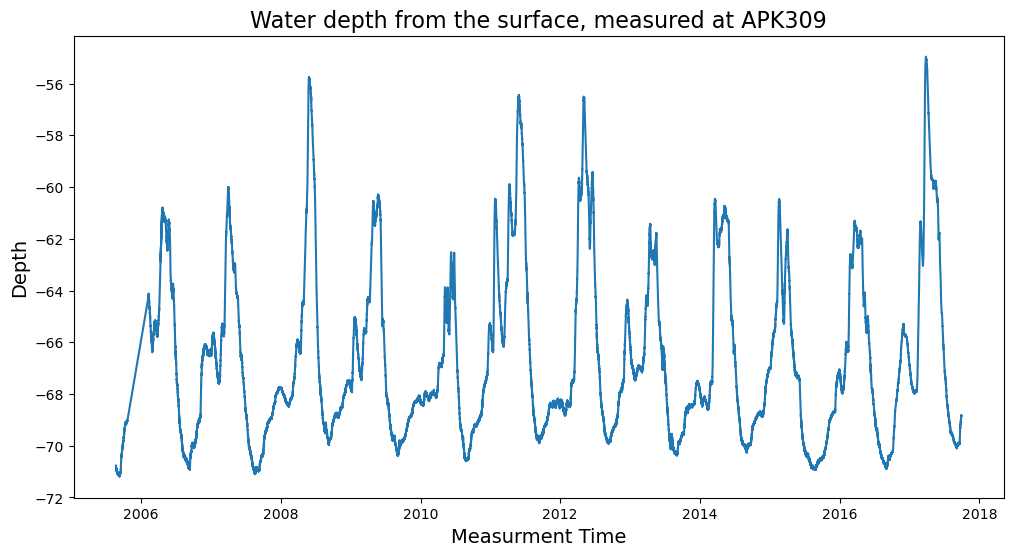

In [30]:
measurment_times = df.meas_time.values
water_depths = df.water_depth.values*-1

plt.figure(figsize=(12,6))
plt.title('Water depth from the surface, measured at AEK201', fontsize=16)

plt.plot(measurment_times, water_depths)

plt.xlabel('Measurment Time', fontsize=14)
plt.ylabel('Depth', fontsize=14)

plt.show()